In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import statsmodels.api as sm

import sys
import os

IN_COLAB = "google.colab" in sys.modules

The code above loads the data, do not modify.

***

# TSO Semester Week 4: Stationarity

In this exercise, we will focus on all topics mentioned in the **TSO forecasting script**, Sections *"Stationarity, Autocorrelation, and Differencing"*. Consequently, this exercise focuses on working with time series data, handling processing, and explore the stationarity property.

This exercise consists of the following eight parts:
1. Importing and Processing Time Series Data
2. Time Series Visualization
3. Autocorrelation Plot (ACF)
4. Differencing
5. Seasonal Differencing
6. Transforming into Stationary Time Series
7. Testing Stationarity

***
## PART 1: Importing and Processing Time Series Data


### Tasks:
1. Import the *El Nino - Sea Surface Temperatures* data set available in the *statsmodels* library.
2. Transform the *pandas* dataframe such that:
- Transform the *YEAR* column to a datetime object
- Set the dataframe index to be the *YEAR* column
- Stack the data to have on single columns for the Time Series values
- Transform the multi-index to a single index by aggregating year and month
- The final form of the dataframe should be one index column descrbibing the year and month, and one column describing the associated values.
3. Display the first few rows of each data set to verify the transformation.

### Import El Nino Dataset

In [4]:
data = sm.datasets.elnino.load_pandas().data
data.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1950.0,23.11,24.20,25.37,23.86,23.03,21.57,20.63,20.15,19.67,20.03,20.02,21.80
1,1951.0,24.19,25.28,25.60,25.37,24.79,24.69,23.86,22.32,21.44,21.77,22.33,22.89
2,1952.0,24.52,26.21,26.37,24.73,23.71,22.34,20.89,20.02,19.63,20.40,20.77,22.39
3,1953.0,24.15,26.34,27.36,27.03,25.47,23.49,22.20,21.45,21.25,20.95,21.60,22.44
4,1954.0,23.02,25.00,25.33,22.97,21.73,20.77,19.52,19.33,18.95,19.11,20.27,21.30


### Transform the El Nino dataframe

In [5]:
#Transform YEAR column to datetime
data['YEAR'] = pd.to_datetime(data['YEAR'].astype(int).astype(str), format='%Y')

#Set the index to the YEAR column
data.set_index('YEAR', inplace=True)

#Stack the data to have one single column of values
data = pd.DataFrame(data.stack())

#Transform the multi-index to a single index by aggregating year and month
months_dict = {"JAN":"01", "FEB":"02", "MAR":"03", "APR":"04", "MAY":"05", "JUN":"06", "JUL":"07", "AUG":"08", "SEP":"09", "OCT":"10", "NOV":"11", "DEC":"12"}
data.index = data.index.map(lambda x: x[0].strftime('%Y') + '-' + months_dict[x[1]])
data.index = pd.to_datetime(data.index, format='%Y-%m')

#Rename the index to Month and the column to Temp
data.index.name = 'Month'
data.columns = ['Temp']

#Visualize the data
data.head()

,Temp
Month,
1950-01-01,23.11
1950-02-01,24.20
1950-03-01,25.37
1950-04-01,23.86
1950-05-01,23.03


***
## PART 2: Time Series Visualization

### Tasks:
1. Add a column to the data for the *rolling mean* over 12 months.
2. Add a column to the data for the *rolling standard deviation* over 12 months.
3. Plot the original time series and the rolling mean using *plotly*.
4. Add the standard deviation using matplotlib fill_between function.
5. Add appropriate labels and grid lines to enhance readability of your plots.

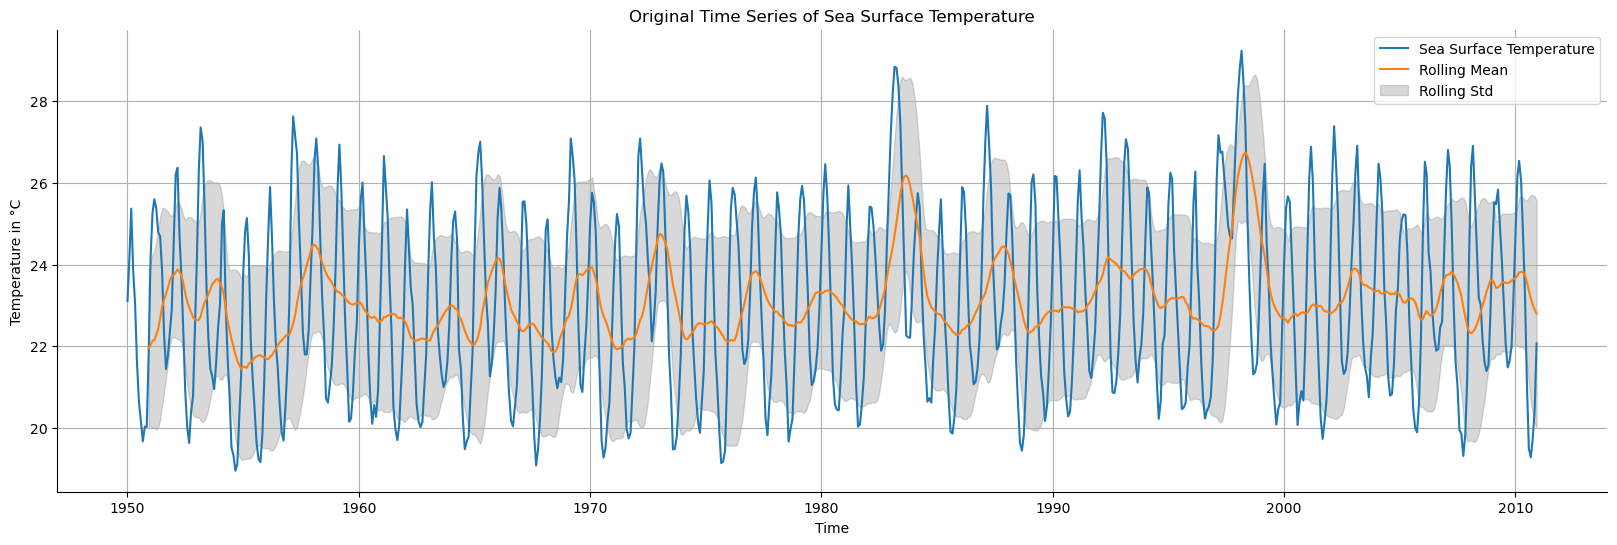

In [9]:

# Calculate the rolling mean and rolling standard deviation over 12 months
data['Rolling Mean'] = data['Temp'].rolling(window=12).mean()
data['Rolling Std'] = data['Temp'].rolling(window=12).std()

# Plot the original time series
plt.figure(figsize=(20, 6))
plt.plot(data["Temp"], label='Sea Surface Temperature')
plt.plot(data["Rolling Mean"], label='Rolling Mean')
plt.fill_between(data.index, data["Rolling Mean"] + data["Rolling Std"],data["Rolling Mean"] - data["Rolling Std"], color="gray", alpha=0.3, label="Rolling Std")
plt.title("Original Time Series of Sea Surface Temperature")
plt.xlabel('Time')
plt.ylabel('Temperature in °C')
plt.grid(True)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.legend()
plt.show()


### Questions:
1. Does the time series has a trend? Yes, the rolling mean seems to increase.
2. Does the time series has a seasonal component? Yes.
3. Does the variance depends on the time of observation? Yes, the size of the std interval seems to vary.
4. Is the time series stationary? No.

*** 
## PART 3: Autocorrelation Plot (ACF)

### Tasks:
1. Use the *statsmodels* function called *plot_acf* to plot the autocorrelation plot of the time series.
2. Add appropriate labels and grid lines to enhance readability of your plots.


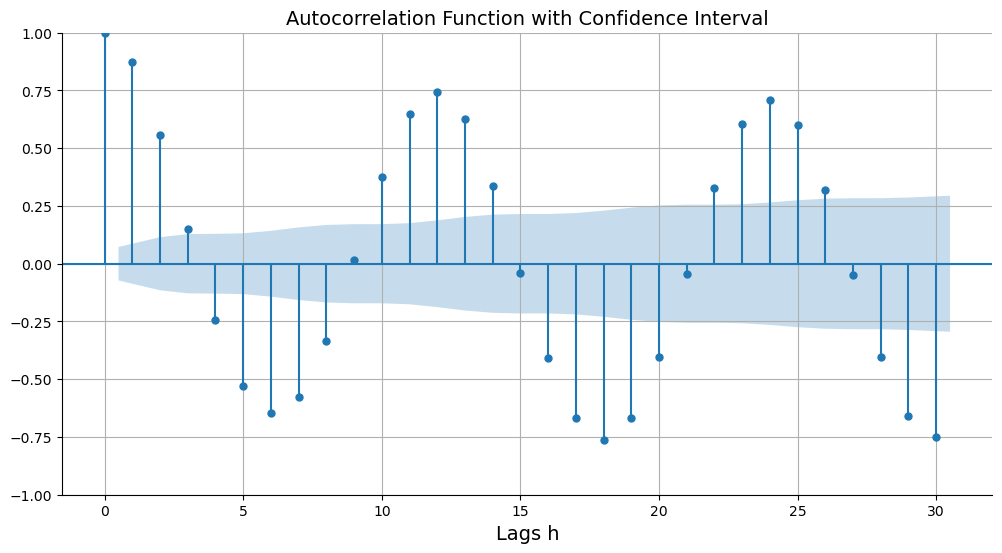

In [10]:
# import the autocorrelation function plot
from statsmodels.graphics.tsaplots import plot_acf

# Plot the autocorrelogram
fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(data['Temp'], lags=30, alpha=0.05, ax=ax)

plt.xlabel('Lags h', fontsize = 14)
plt.title('Autocorrelation Function with Confidence Interval', fontsize = 14)
plt.grid(True)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.show()

### Questions:Can you conlcude about:
1. The Trend? It has a trend because of the slow decrease of the ACF for the small lags.
3. The Seasonality? It has a seasonality because of the high acf at lags multiples of 6.
4. The Stationarity? Obviously not.

*** 
## PART 4: Differencing

### Tasks:
1. Difference to the first order the time series.
2. Plot the differenced time series and its rolling average over 12 months.
3. Plot the ACF plot of the differenced time series.


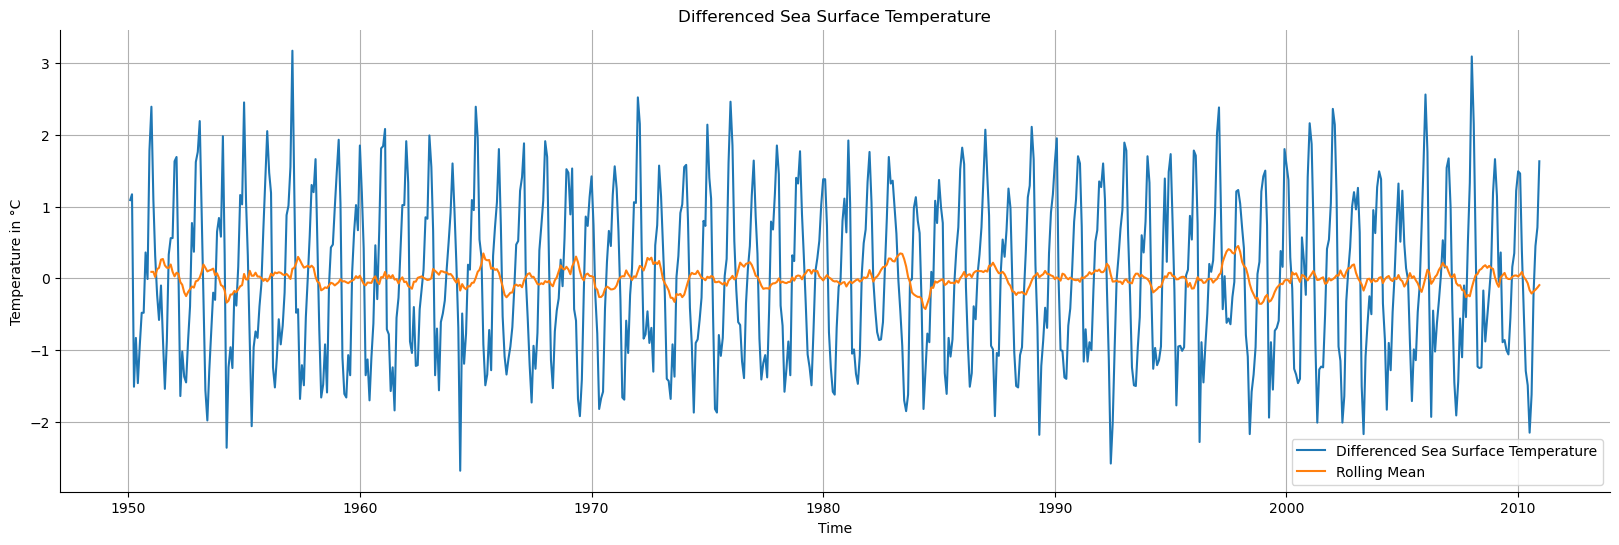

In [11]:
# Difference the data to remove the trend
data['Temp_diff1'] = data['Temp'].diff()

# Plot the differenced time series and it's rolling mean
plt.figure(figsize=(20, 6))
plt.plot(data["Temp_diff1"], label='Differenced Sea Surface Temperature')
plt.plot(data["Temp_diff1"].rolling(window=12).mean(), label='Rolling Mean')
plt.title("Differenced Sea Surface Temperature")
plt.xlabel('Time')
plt.ylabel('Temperature in °C')
plt.grid(True)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.legend()
plt.show()

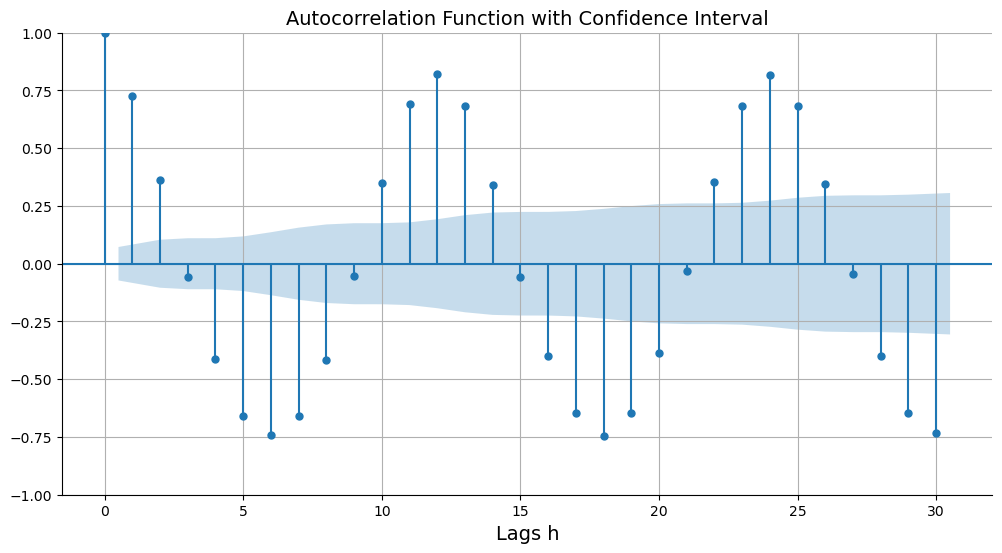

In [12]:
# Plot the autocorrelogram of the differenced time series
fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(data['Temp_diff1'].dropna(), lags=30, alpha=0.05, ax=ax)

plt.xlabel('Lags h', fontsize = 14)
plt.title('Autocorrelation Function with Confidence Interval', fontsize = 14)
plt.grid(True)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.show()

### Questions:
- Is the Trend removed? The Seasonality? The trend seems removed according to the rolling mean, but not to the ACF plot. The seasonality is still there.

### Task:
1. Difference again until the trend is removed. Use the ACF plot.

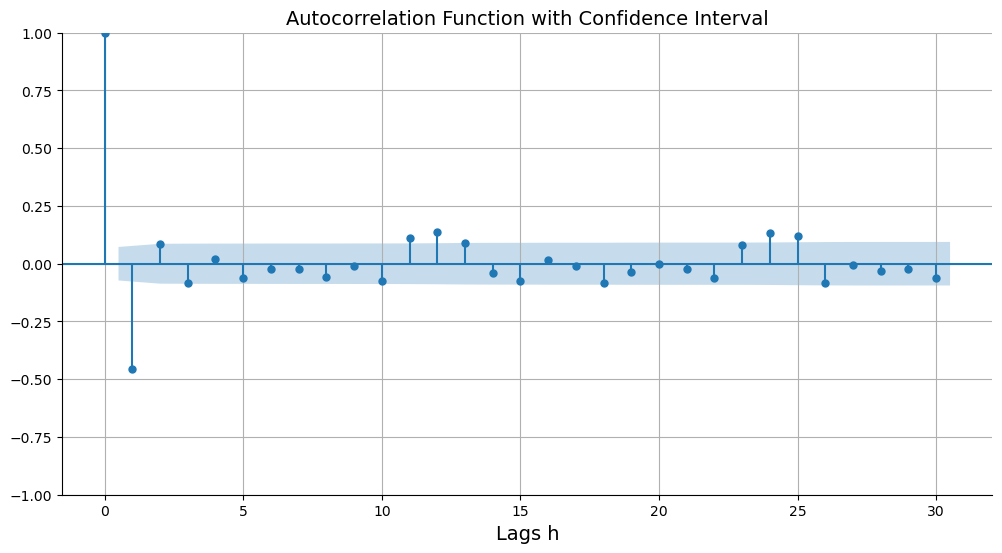

In [13]:
# Difference the data again until the trend is removed
data['Temp_diff2'] = data['Temp_diff1'].diff()
data['Temp_diff3'] = data['Temp_diff2'].diff() # Here the trend seems to be removed.
data['Temp_diff4'] = data['Temp_diff3'].diff()

# Plot the autocorrelogram of the differenced time series
fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(data['Temp_diff3'].dropna(), lags=30, alpha=0.05, ax=ax)

plt.xlabel('Lags h', fontsize = 14)
plt.title('Autocorrelation Function with Confidence Interval', fontsize = 14)
plt.grid(True)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.show()

### Questions:
- How many order of differencing is needed to remove the trend? 3 seems a suitable order.
- Is the data stationary? Almost, but we still have seasonal components. 

***
## PART 5: Seasonal Differencing

### Tasks:
1. Perfrom a seasonal differencing to remove the seasonality.
2. Plot the transformed time series.
3. Plot the ACF.

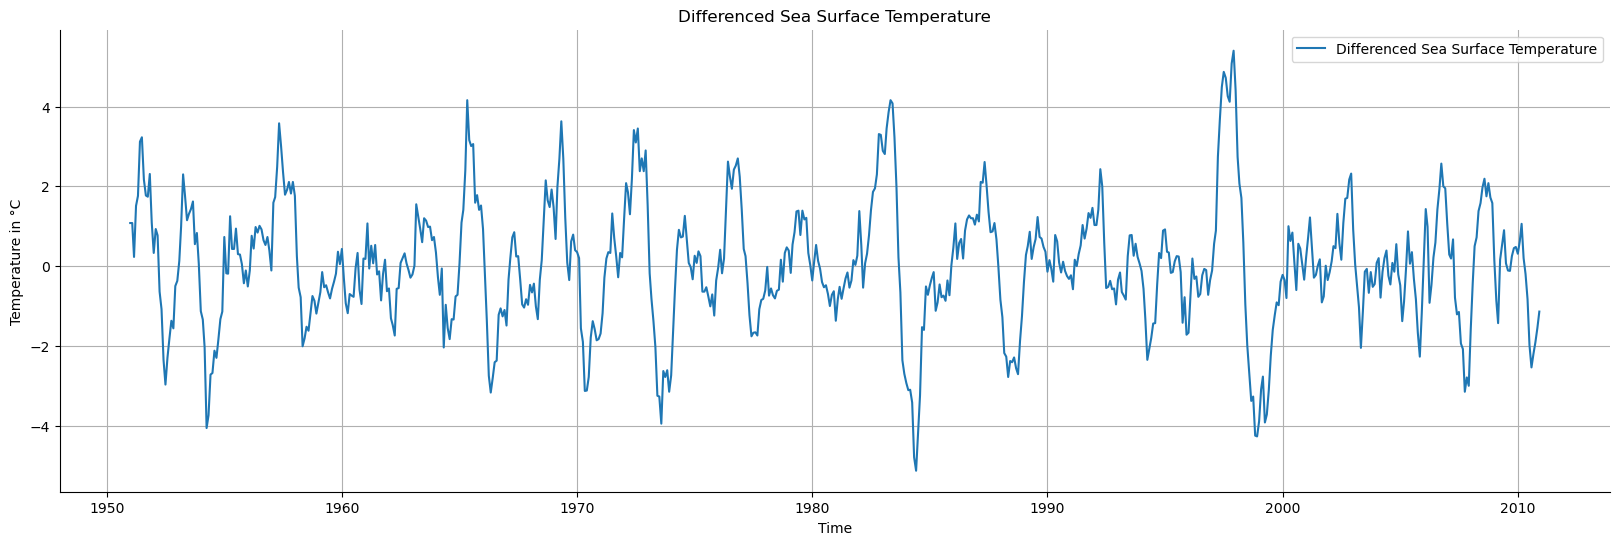

In [14]:
# Difference the original data get rid of seasonality
data['Temp_diff12'] = data['Temp'].diff(12)

# Plot the seasonally differenced time series
plt.figure(figsize=(20, 6))
plt.plot(data["Temp_diff12"], label='Differenced Sea Surface Temperature')
plt.title("Differenced Sea Surface Temperature")
plt.xlabel('Time')
plt.ylabel('Temperature in °C')
plt.grid(True)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.legend()
plt.show()



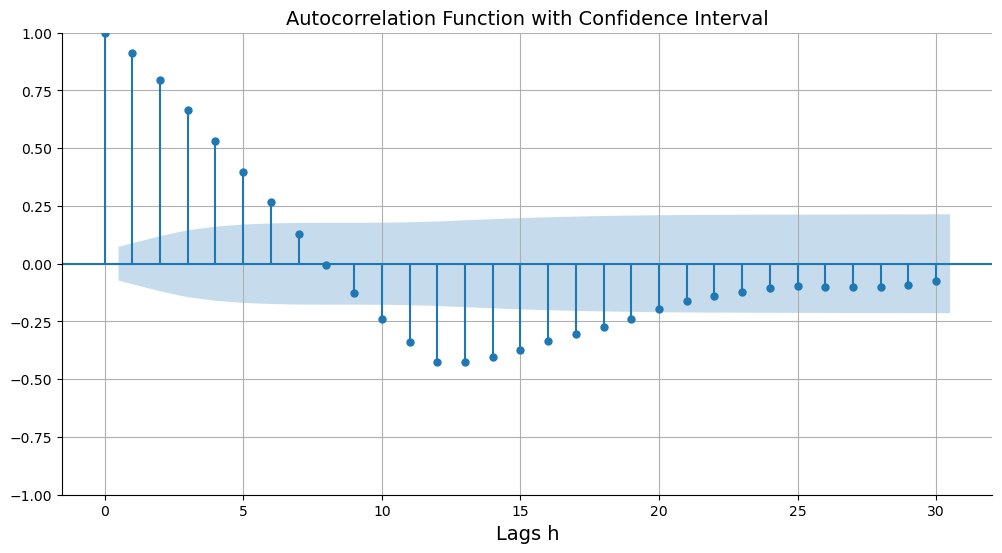

In [15]:
# Plot the autocorrelogram of the seasonally differenced time series
fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(data['Temp_diff12'].dropna(), lags=30, alpha=0.05, ax=ax)

plt.xlabel('Lags h', fontsize = 14)
plt.title('Autocorrelation Function with Confidence Interval', fontsize = 14)
plt.grid(True)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.show()

### Questions:
- Is the seasonality removed? No because we have significant ACF around lag 12.

### Tasks:
1. Perform several seasonal differencings until the seasonality is removed. Plot the ACF.

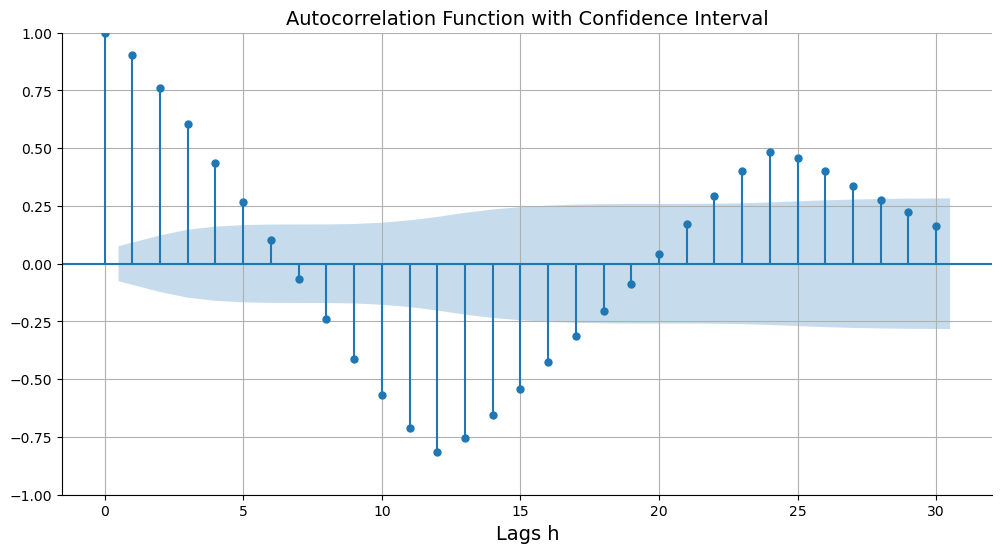

In [27]:
# Seasonally difference the data again until the seasonality seems removed
data['Temp_diff12_2'] = data['Temp_diff12'].diff(12)
data['Temp_diff12_3'] = data['Temp_diff12_2'].diff(12) 
data['Temp_diff12_4'] = data['Temp_diff12_3'].diff(12) 
data['Temp_diff12_5'] = data['Temp_diff12_4'].diff(12) 

# Plot the autocorrelogram of the seasonally differenced time series
fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(data['Temp_diff12_5'].dropna(), lags=30, alpha=0.05, ax=ax)

plt.xlabel('Lags h', fontsize = 14)
plt.title('Autocorrelation Function with Confidence Interval', fontsize = 14)
plt.grid(True)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.show()

### Questions:
- What phenomenon do you observe? It is hard to get rid of the seasonality, even with multiple differencing.
- Which seasonal difference order do you select? 1 seemed quite suitable because higher lags are not significanlty different from 0. 

***
## PART 6: Make the time series stationary

### Tasks:
1. Combine the differencing and the sesonal differencing to remove both the trend and de seasonality to make the data stationary.
2. Plot the stationarized Time Series and its rolling mean over 12 months.
3. Plot the ACF.


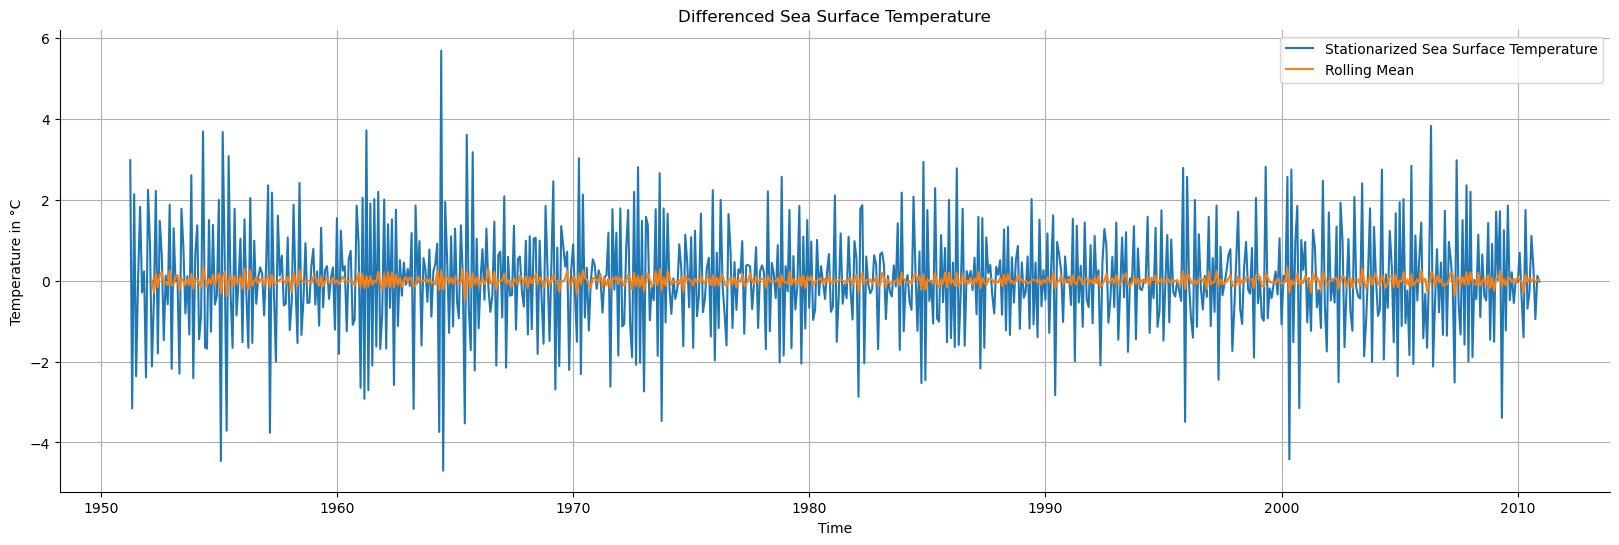

In [29]:
# Combine the differencing and seasonally differencing to remove both trend and seasonality and make the data stationary
data['Temp_diff3_12'] = data['Temp_diff3'].diff(12)

# Plot the stationarized time series
plt.figure(figsize=(20, 6))
plt.plot(data["Temp_diff3_12"], label='Stationarized Sea Surface Temperature')
plt.plot(data["Temp_diff3_12"].rolling(window=12).mean(), label='Rolling Mean')
plt.title("Differenced Sea Surface Temperature")
plt.xlabel('Time')
plt.ylabel('Temperature in °C')
plt.grid(True)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.legend()
plt.show()

### Questions:
- Does it look stationary? Yes: it looks very much like a withe noise, with no trend, no seasonality, and a variance that doesn't depends on time. 

***
## PART 7: Test for Stationarity

### Tasks:
1. Use the KPSS test from *statsmodels* to test check stationarity of the transformed time series.

In [30]:
#Import KPSS test
from statsmodels.tsa.stattools import kpss

#Run KPSS test
stat, p_value, lags, critical_values = kpss(data["Temp_diff3_12"].dropna(), regression='c', nlags="auto")

print(f"KPSS Statistic: {stat}")
print(f"p-value: {p_value}")

# Interpret the p-value
if p_value < 0.05:
    print("The time series is likely non-stationary (reject null hypothesis).")
else:
    print("The time series is likely stationary (fail to reject null hypothesis).")

KPSS Statistic: 0.04402373332501336
p-value: 0.1
The time series is likely stationary (fail to reject null hypothesis).


C:\Users\kruu\AppData\Local\Temp\ipykernel_6964\3183852183.py:5: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


